In [1]:
import pandas as pd
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense

2023-04-17 14:05:22.799431: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-17 14:05:22.844886: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 14:05:23.916307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("german_encoded.csv")

In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Bar Plots

[Text(0, 0, '409'), Text(0, 0, '232'), Text(0, 0, '69'), Text(0, 0, '40')]

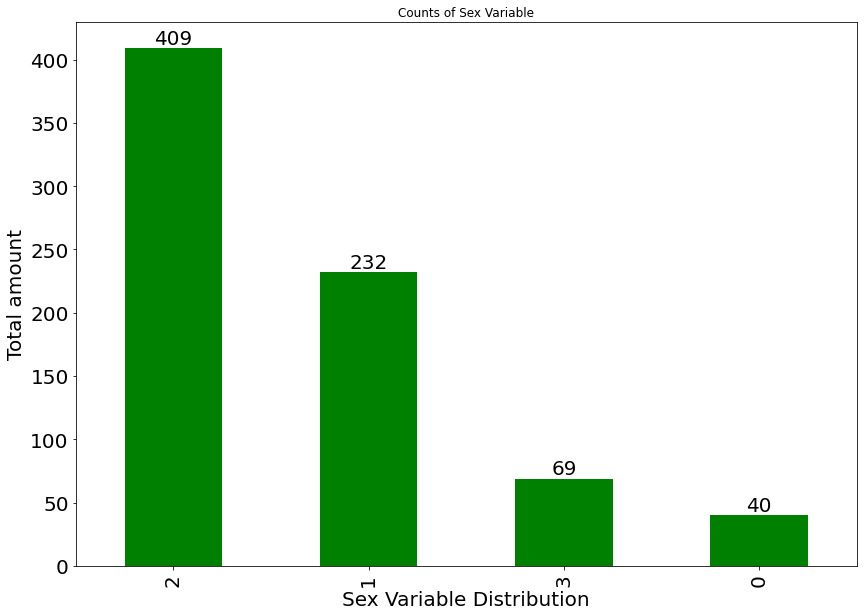

In [4]:
ax = X_train['8'].value_counts().plot(kind = 'bar', figsize=(14,10), title="Counts of Sex Variable", fontsize=20, color="green")
ax.set_xlabel("Sex Variable Distribution", fontsize=20)
ax.set_ylabel("Total amount", fontsize=20)
ax.bar_label(ax.containers[0], fontsize=20)

[Text(0, 0, '721'), Text(0, 0, '29')]

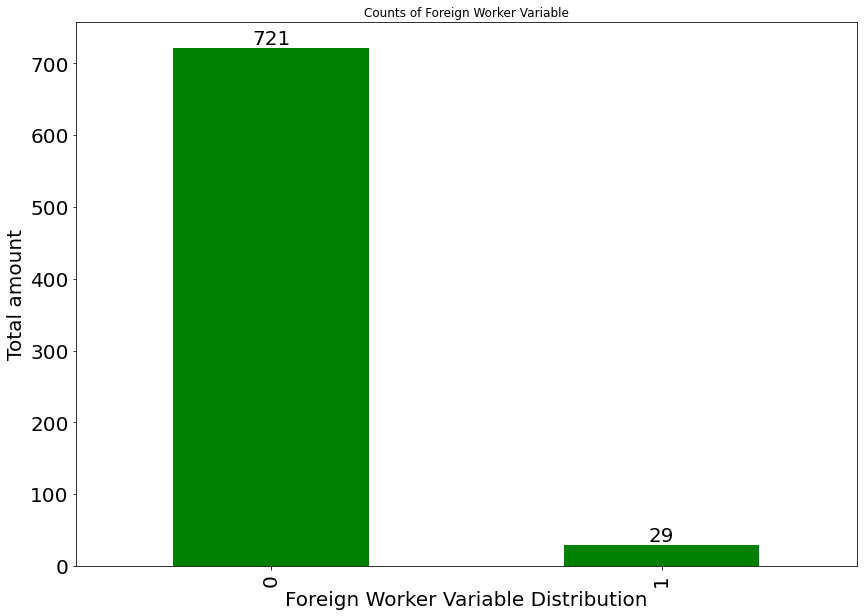

In [5]:
ax = X_train['19'].value_counts().plot(kind = 'bar', figsize=(14,10), title="Counts of Foreign Worker Variable", fontsize=20, color="green")
ax.set_xlabel("Foreign Worker Variable Distribution", fontsize=20)
ax.set_ylabel("Total amount", fontsize=20)
ax.bar_label(ax.containers[0], fontsize=20)

[Text(0, 0, '480'), Text(0, 0, '149'), Text(0, 0, '108'), Text(0, 0, '13')]

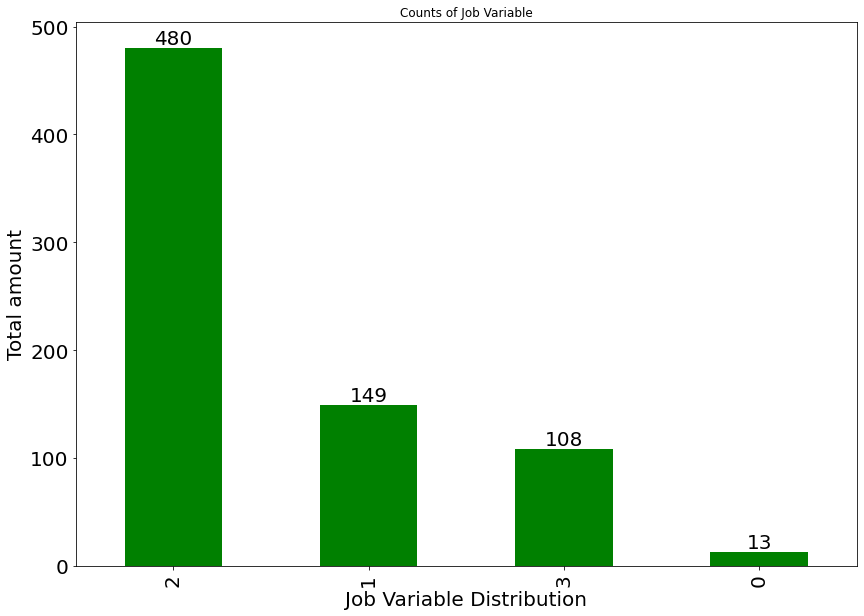

In [6]:
ax = X_train['16'].value_counts().plot(kind = 'bar', figsize=(14,10), title="Counts of Job Variable", fontsize=20, color="green")
ax.set_xlabel("Job Variable Distribution", fontsize=20)
ax.set_ylabel("Total amount", fontsize=20)
ax.bar_label(ax.containers[0], fontsize=20)

[Text(0, 0, '213'), Text(0, 0, '191'), Text(0, 0, '174'), Text(0, 0, '172')]

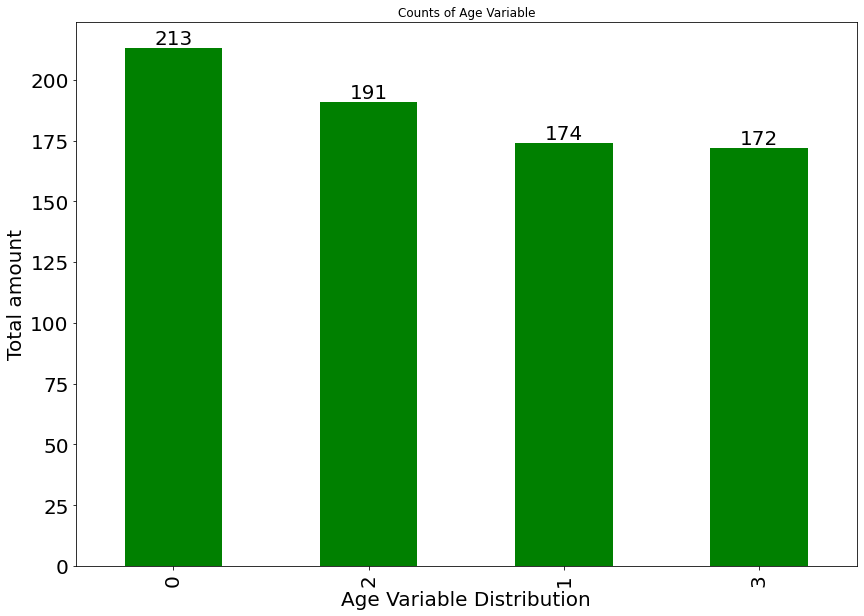

In [7]:
ax = X_train['12'].value_counts().plot(kind = 'bar', figsize=(14,10), title="Counts of Age Variable", fontsize=20, color="green")
ax.set_xlabel("Age Variable Distribution", fontsize=20)
ax.set_ylabel("Total amount", fontsize=20)
ax.bar_label(ax.containers[0], fontsize=20)

[Text(0, 0, '442'), Text(0, 0, '308')]

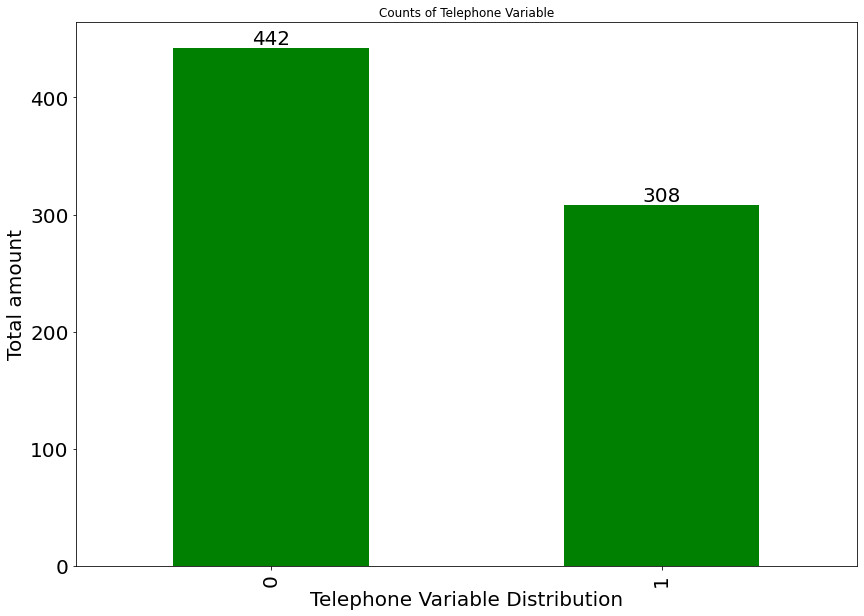

In [8]:
ax = X_train['18'].value_counts().plot(kind = 'bar', figsize=(14,10), title="Counts of Telephone Variable", fontsize=20, color="green")
ax.set_xlabel("Telephone Variable Distribution", fontsize=20)
ax.set_ylabel("Total amount", fontsize=20)
ax.bar_label(ax.containers[0], fontsize=20)

[Text(0, 0, '525'), Text(0, 0, '225')]

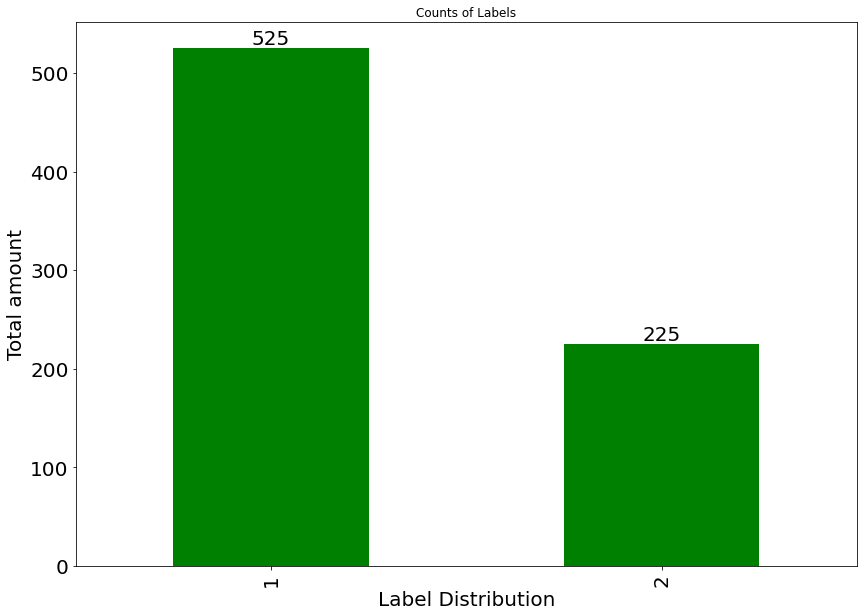

In [9]:
ax = y_train.value_counts().plot(kind = 'bar', figsize=(14,10), title="Counts of Labels", fontsize=20, color="green")
ax.set_xlabel("Label Distribution", fontsize=20)
ax.set_ylabel("Total amount", fontsize=20)
ax.bar_label(ax.containers[0], fontsize=20)

SVM Evaluation

In [6]:
best_svm = SVC(C=20, gamma=0.01, kernel='rbf').fit(X_train, y_train)

In [7]:
#Number of support vectors for each class.
best_svm.n_support_

array([229, 191], dtype=int32)

In [8]:
#Return the mean accuracy on the given test data and labels.
best_svm.score(X_train, y_train)

0.8693333333333333

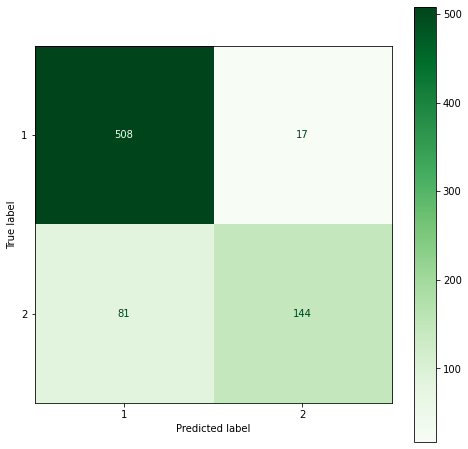

In [12]:
#prediction
svm_predict = best_svm.predict(X_train)

# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_train, svm_predict)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['BIC', 'KRCCC', 'LA', 'LSCC', 'PA', 'UM'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_svm.classes_)

# display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Greens)

# rotate the x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels())

plt.show()

## Test Data

In [13]:
#Return the mean accuracy on the given test data and labels.
best_svm.score(X_test, y_test)

0.744

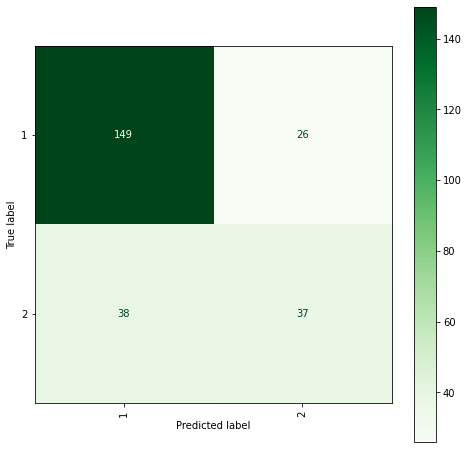

In [14]:
#prediction
svm_test_predict = best_svm.predict(X_test)

# y_test: true labels, y_pred: predicted labels
cm = confusion_matrix(y_test, svm_test_predict)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['BIC', 'KRCCC', 'LA', 'LSCC', 'PA', 'UM'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_svm.classes_)

# display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Greens)

# rotate the x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [41]:
FP = cm.sum(axis=0) - np.diag(cm)  
TP = np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)

# False discovery rate
FDR = FP/(TP+FP)
FDR

array([0.20320856, 0.41269841])

In [42]:
np.average(FDR)

0.30795348442407267

In [43]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
TPR

array([0.85142857, 0.49333333])

In [44]:
np.average(TPR)

0.6723809523809524

In [41]:
misclassified_mask = (svm_test_predict != y_test)
classified_mask = (svm_test_predict == y_test)

In [28]:
# Convert the X_test and y_test arrays to pandas dataframes
test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['target'] = y_test
test_df['predicted'] = svm_test_predict

In [42]:
misclassified_df = test_df[misclassified_mask]
classified_df = test_df[classified_mask]

In [32]:
# Create a new dataset containing the rows where the value in the "category" column is "A"
misscl_true_2 = misclassified_df[misclassified_df["target"] == 2]

# Create a new dataset containing the rows where the value in the "category" column is "B"
misscl_true_1 =misclassified_df[misclassified_df["target"] == 1]

# Misclassified 2 as 1

In [34]:
misscl_true_2.shape

(38, 22)

In [47]:
mode_true_2 = misscl_true_2.mode()
mode_true_2 = pd.DataFrame(mode_true_2)
mode_true_2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,target,predicted
0,0,0.0,2.0,0.0,3.0,0.0,2.0,4.0,2.0,0.0,...,0.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Misclassified 1 as 2

In [35]:
misscl_true_1.shape

(26, 22)

In [48]:
mode_true_1 = misscl_true_1.mode()
mode_true_1 = pd.DataFrame(mode_true_1)
mode_true_1

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,target,predicted
0,0.0,2.0,2.0,4.0,2.0,0.0,0.0,4.0,2.0,0.0,...,0,2.0,1.0,1.0,2.0,1.0,0,0.0,1.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


# Correctly Classified

In [44]:
# Create a new dataset containing the rows where the value in the "category" column is "A"
cl_2 = classified_df[classified_df["target"] == 2]

# Create a new dataset containing the rows where the value in the "category" column is "B"
cl_1 =classified_df[classified_df["target"] == 1]

In [49]:
mode_1 = cl_1.mode()
mode_1 = pd.DataFrame(mode_1)
mode_1

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,target,predicted
0,3,0,2,4,1,0,2,4,2,0,...,3,2,1,1,2,1,0,0,1,1


In [50]:
mode_2 = cl_2.mode()
mode_2 = pd.DataFrame(mode_2)
mode_2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,target,predicted
0,0,3,2,0,3,0,2,4,2,0,...,0,2,1,1,2,1,0,0,2,2


# Mode Comparison

In [51]:
mode = pd.DataFrame()
mode['true 2.1'] = mode_true_2.iloc[0,:]
mode['true 2.2'] = mode_true_2.iloc[1,:]
mode['true 1.1'] = mode_true_1.iloc[0,:]
mode['true 1.2'] = mode_true_1.iloc[1,:]
mode['correct 2'] = mode_2.iloc[0,:]
mode['correct 1'] = mode_1.iloc[0,:]

In [52]:
mode

,true 2.1,true 2.2,true 1.1,true 1.2,correct 2,correct 1
0,0.0,1.0,0.0,NaN,0,3
1,0.0,NaN,2.0,NaN,3,0
2,2.0,NaN,2.0,NaN,2,2
3,0.0,NaN,4.0,NaN,0,4
4,3.0,NaN,2.0,NaN,3,1
5,0.0,NaN,0.0,NaN,0,0
6,2.0,NaN,0.0,NaN,2,2
7,4.0,NaN,4.0,NaN,4,4
8,2.0,NaN,2.0,NaN,2,2
9,0.0,NaN,0.0,NaN,0,0


In [53]:
mode.to_csv('german_cm_mode.csv', index=False)

# Summary by class

In [58]:
# get a summary of statistics for all numeric columns
sum_misscl_true_2 = misscl_true_2.describe()

# transpose the summary dataframe to switch rows and columns
sum_misscl_true_2 = sum_misscl_true_2.transpose()

# select the mean, min, and max columns
#summary = summary[['mean', 'min', 'max']]
sum_misscl_true_2_pd = pd.DataFrame(sum_misscl_true_2)

# print the summary dataframe
sum_misscl_true_2_pd

sum_misscl_true_2_pd.to_csv('sum_misscl_true_2.csv', index=False)

In [59]:
# get a summary of statistics for all numeric columns
sum_misscl_true_1 = misscl_true_1.describe()

# transpose the summary dataframe to switch rows and columns
sum_misscl_true_1 = sum_misscl_true_1.transpose()

# select the mean, min, and max columns
#summary = summary[['mean', 'min', 'max']]
sum_misscl_true_1_pd = pd.DataFrame(sum_misscl_true_1)

# print the summary dataframe
sum_misscl_true_1_pd

sum_misscl_true_1_pd.to_csv('sum_misscl_true_1.csv', index=False)

In [60]:
# get a summary of statistics for all numeric columns
sum_cl_1 = cl_1.describe()

# transpose the summary dataframe to switch rows and columns
sum_cl_1 = sum_cl_1.transpose()

# select the mean, min, and max columns
#summary = summary[['mean', 'min', 'max']]
sum_cl_1_pd = pd.DataFrame(sum_cl_1)

# print the summary dataframe
sum_cl_1_pd

sum_cl_1_pd.to_csv('sum_cl_1.csv', index=False)

In [61]:
# get a summary of statistics for all numeric columns
sum_cl_2 = cl_2.describe()

# transpose the summary dataframe to switch rows and columns
sum_cl_2 = sum_cl_2.transpose()

# select the mean, min, and max columns
#summary = summary[['mean', 'min', 'max']]
sum_cl_2_pd = pd.DataFrame(sum_cl_2)

# print the summary dataframe
sum_cl_2_pd

sum_cl_2_pd.to_csv('sum_cl_2.csv', index=False)